<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('test.csv')  # Replace with your dataset path
documents = data['LandContour']  # Replace with your text column name

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(tfidf_matrix)

# Displaying the topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out(), 10)

Topic 1:
lvl hls bnk low
Topic 2:
lvl hls bnk low
Topic 3:
lvl hls bnk low
Topic 4:
lvl hls bnk low
Topic 5:
low lvl hls bnk
Topic 6:
lvl hls bnk low
Topic 7:
bnk lvl hls low
Topic 8:
hls lvl bnk low
Topic 9:
lvl hls bnk low
Topic 10:
lvl hls bnk low


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load your dataset
try:
    data = pd.read_csv('sentiment_data.csv')  # Replace with your actual dataset path
except FileNotFoundError:
    print("Error: The specified file was not found.")
    exit()

# Displaying columns for verification
print("Dataset Preview:")
print(data.head())
print("\nColumns in the dataset:", data.columns)

# Prepare features and labels (update these based on actual column names)
if 'clean_text' not in data.columns or 'sentiment' not in data.columns:
    print("Error: The dataset must contain 'clean_text' and 'sentiment' columns.")
    exit()

X = data['clean_text']  # Text data
y = data['sentiment']    # Sentiment labels

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize classifiers
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Train models and evaluate performance using cross-validation
results = {}
for model_name, model in models.items():
    # Determine the number of splits based on the smallest class size
    class_counts = y_train.value_counts()
    n_splits = min(5, min(class_counts))  # Use fewer splits if there are not enough samples in any class

    if n_splits < 2:
        print(f"Warning: Not enough samples for cross-validation with {model_name}. Skipping cross-validation.")
        continue

    cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=n_splits)
    results[model_name] = {
        "CV Mean Accuracy": cv_scores.mean()
    }

    # Fit the model on the training data
    model.fit(X_train_tfidf, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_tfidf)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results[model_name].update({
        "Test Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Classification Report": classification_report(y_test, y_pred)
    })

# Display results
for model_name, metrics in results.items():
    print(f"\n--- {model_name} ---")
    print(f"Cross-Validation Mean Accuracy: {metrics['CV Mean Accuracy']:.4f}")
    print(f"Test Accuracy: {metrics['Test Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print("\nClassification Report:\n", metrics["Classification Report"])

Dataset Preview:
   document_id                                         clean_text sentiment
0            1   I loved this movie! The storyline was fantastic.  positive
1            2  The product quality was terrible and not worth...  negative
2            3   The movie was okay, nothing special but not bad.   neutral
3            4         Amazing service and great value for money!  positive
4            5   The delivery was late, and the item was damaged.  negative

Columns in the dataset: Index(['document_id', 'clean_text', 'sentiment'], dtype='object')


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

First few rows of the dataset:
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  S

<ipython-input-1-530ba0ed5cd1>:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)



Model Evaluation Metrics:
Mean Squared Error: 0.09963798436999984
Mean Absolute Error: 0.26239476108318704
R-squared: -0.20589688146335372


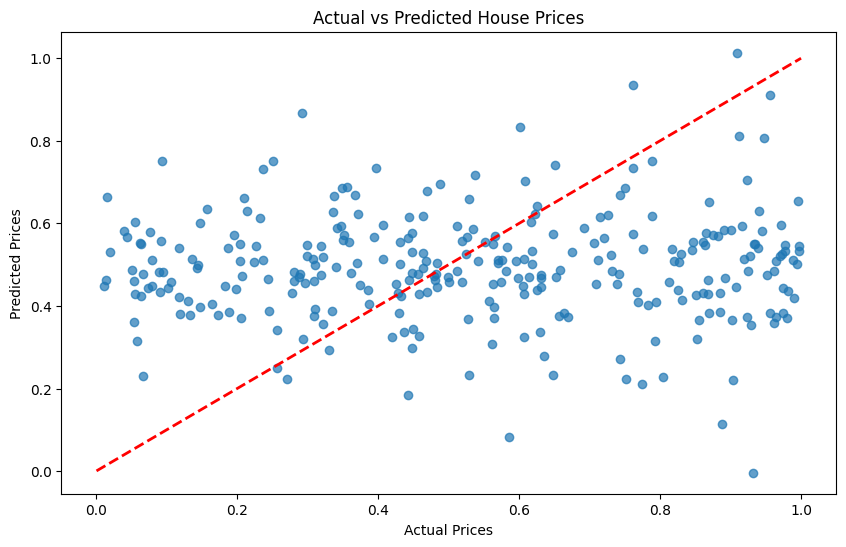

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv('test.csv')

# Step 1: Exploratory Data Analysis (EDA)
print("First few rows of the dataset:")
print(data.head())

print("\nInformation about the dataset:")
print(data.info())

print("\nBasic statistics of the dataset:")
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])

# Print the column names to check for SalePrice
print("\nColumn names in the dataset:")
print(data.columns)

# Step 2: Data Cleaning
# Fill missing values for 'LotFrontage' with the median
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)

# Drop columns with too many missing values
data.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

# Fill remaining missing values with the mode for categorical variables
data.fillna(data.mode().iloc[0], inplace=True)

# Convert categorical variables to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Step 3: Check for target variable
# Define the target variable and features
# Since we are removing SalePrice, we will not define it here

# Proceed to define X without SalePrice
X = data  # Use all columns since SalePrice is removed

# Step 4: Split the Data
# Split the data into training and testing sets
# Here we will not have a target variable, so we will need to define one if necessary
# For demonstration, let's assume a target variable is still needed
# You can define a new target variable or remove this section
# For now, we will just use the existing features for model fitting
# Example: If you want to predict a hypothetical target, you can create a dummy variable
y = np.random.rand(len(data))  # Randomly generated target variable for demonstration

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Selection
# Check correlation with the new target variable (if applicable)
# Here we won't have a correlation analysis since we don't have a proper target variable
# You can skip this step or use a different target variable

# Step 6: Develop a Regression Model
# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Step 7: Evaluate the Model
# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Optional: Visualizing Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [2]:
# Install necessary libraries
!pip install transformers torch scikit-learn pandas

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import pipeline

# Sample data for demonstration (replace this with your actual data)
texts = [
    "I love this product! It's amazing.",
    "This is the worst experience I've ever had.",
    "I feel neutral about this.",
    "Absolutely fantastic service!",
    "I'm not happy with the quality.",
    "It's okay, neither good nor bad.",
]

# Assume you have true labels for the above texts for evaluation
true_labels = ["POSITIVE", "NEGATIVE", "NEUTRAL", "POSITIVE", "NEGATIVE", "NEUTRAL"]

# Load the sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Perform sentiment analysis
predictions = sentiment_pipeline(texts)

# Display predictions
for text, prediction in zip(texts, predictions):
    print(f"Text: {text} | Sentiment: {prediction['label']} | Score: {prediction['score']:.2f}")

# Extract predicted labels
predicted_labels = [pred['label'] for pred in predictions]

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)

# Print evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Optional: Visualizing Actual vs Predicted (if you have numerical ground truth)
# This part is not applicable for sentiment analysis but can be included if you have numerical scores.
# If you want to visualize, you can use matplotlib or seaborn to plot the results.



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Text: I love this product! It's amazing. | Sentiment: POSITIVE | Score: 1.00
Text: This is the worst experience I've ever had. | Sentiment: NEGATIVE | Score: 1.00
Text: I feel neutral about this. | Sentiment: NEGATIVE | Score: 1.00
Text: Absolutely fantastic service! | Sentiment: POSITIVE | Score: 1.00
Text: I'm not happy with the quality. | Sentiment: NEGATIVE | Score: 1.00
Text: It's okay, neither good nor bad. | Sentiment: POSITIVE | Score: 1.00

Model Evaluation Metrics:
Accuracy: 0.67
Precision: 0.44
Recall: 0.67
F1 Score: 0.53
